In [3]:
import os 
import glob

import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from typing import Tuple

### Load csv file 

In [3]:
PATH_TO_IMG = r"../data/"
filenames = glob.glob(os.path.join(PATH_TO_IMG, "imgs","*.jpg"))
filenames[:3]

['../data/imgs/e272c22b-57bc-4e8b-a2c0-f18541500fd0.jpg',
 '../data/imgs/05bd8e8e-fd62-41ed-a0e7-3c1cd19d651d.jpg',
 '../data/imgs/eae975ab-3114-47f4-ad2a-cbdb0c5a89c5.jpg']

In [4]:
df = pd.read_csv(os.path.join(PATH_TO_IMG,"car_imgs_4000.csv"))
df.head()

,filename,perspective_score_hood,perspective_score_backdoor_left
0,66ee2d88-f403-4821-a370-8a3d72e200f9.jpg,0.27352,0.439526
1,bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg,0.00000,0.902682
2,4c297488-c81f-464d-92bf-1c408333a912.jpg,0.00000,0.900864
3,6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg,0.00000,0.213162
4,bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg,0.00000,0.818388


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   filename                         4000 non-null   object 
 1   perspective_score_hood           4000 non-null   float64
 2   perspective_score_backdoor_left  4000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 93.9+ KB


In [71]:
df.describe()

,perspective_score_hood,perspective_score_backdoor_left
count,4000.000000,4000.000000
mean,0.303032,0.313368
std,0.382582,0.372334
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.771014,0.686797
max,0.922428,0.939541


**Conclusion**: 
- filename: str pointing to the corresponding image in imgs folder 
- predictive_score_hood: float64  ranging from 0-1
- predictive_score_backdoor_left: float64 ranging from 0-1

### EDA

In [77]:
df.isna().sum()

filename                           0
perspective_score_hood             0
perspective_score_backdoor_left    0
dtype: int64

In [78]:
df.duplicated().sum()

0

In [172]:

fig = make_subplots(rows=1, cols=1, shared_yaxes=True, subplot_titles=("Distribution Plot for Scores",))
fig.add_trace(go.Histogram({'x': df["perspective_score_hood"]}, name="Hood"),
              1, 1)
fig.add_trace(go.Histogram({'x': df["perspective_score_backdoor_left"]}, name="Backdoor Left"),
              1, 1)

fig.update_layout(height=600, width=800)
fig.show()

In [174]:
fig = make_subplots(rows=1, cols=1, shared_yaxes=True, subplot_titles=("Outlier Detection for Scores",))
fig.add_trace(go.Box({'y': df["perspective_score_hood"]}, name="Predictive Score Hood"),
              1, 1)
fig.add_trace(go.Box({'y': df["perspective_score_backdoor_left"]}, name="Predictive Score Backdoor Left"),
              1, 1)
fig.update_layout(height=600, width=800)
fig.show()

In [196]:
group_labels = ['Hood', 'Backdoor Left']
# Create distplot with custom bin_size
fig = ff.create_distplot([df["perspective_score_hood"].to_numpy(),df["perspective_score_backdoor_left"].to_numpy()],group_labels=group_labels, bin_size=0.1,show_rug=False)
fig.show()

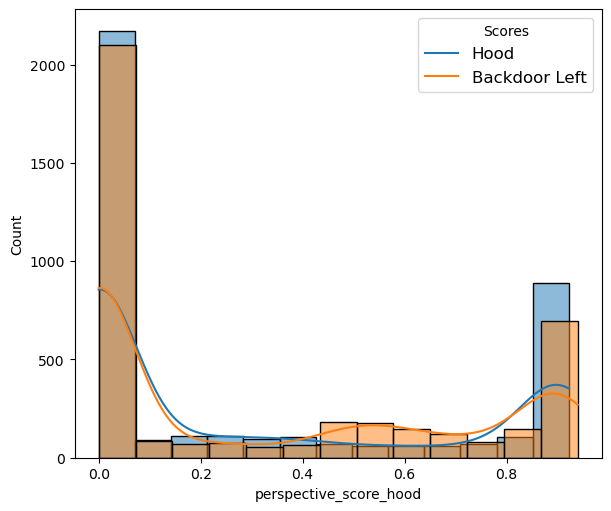

In [167]:
fig = plt.figure(constrained_layout=True, figsize=(6, 5))
spec = fig.add_gridspec(1, 2)
ax5 = fig.add_subplot(spec[0, :])
_ = sns.histplot(df["perspective_score_hood"], kde=True, legend=True, ax=ax5)
_ = sns.histplot(df["perspective_score_backdoor_left"], kde=True, legend=True, ax=ax5)
ax5.legend(['Hood', 'Backdoor Left'], title='Scores', prop={'size': 12})
plt.show()

In [207]:
print(f"Skewness Value is: \n{df.skew(numeric_only=True)}")
print("______________________________________________")
print(f"Kurtosis Value is: \n{df.kurtosis(numeric_only=True)}")


Skewness Value is: 
perspective_score_hood             0.707402
perspective_score_backdoor_left    0.579164
dtype: float64
______________________________________________
Kurtosis Value is: 
perspective_score_hood            -1.294274
perspective_score_backdoor_left   -1.393794
dtype: float64


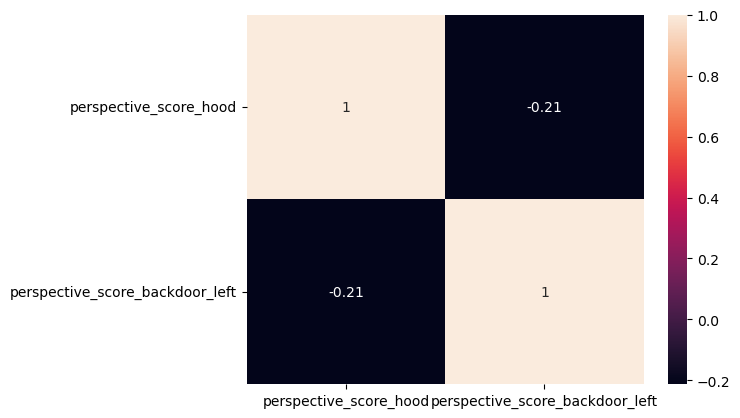

In [209]:
corr = df.corr(method="pearson", numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show("Correlation Matrix")
plt.show()

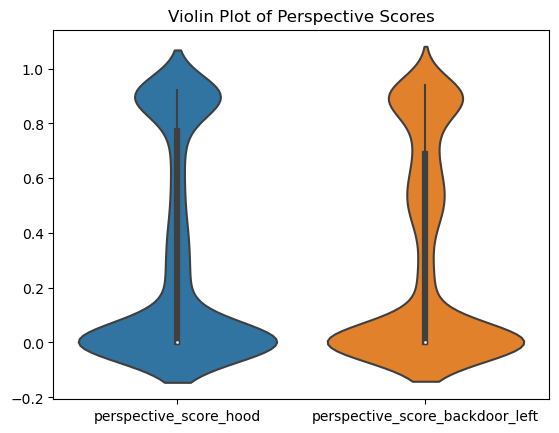

In [224]:
sns.violinplot(data=df[['perspective_score_hood', 'perspective_score_backdoor_left']])
plt.title('Violin Plot of Perspective Scores')
plt.show()

In [317]:
# plot random images 
def plot_random_images(df: pd.DataFrame, n_imgs: int) -> None: 
    subsample = df.sample(n_imgs)
    plt.figure(figsize=(20,10))
    for i in range(n_imgs): 
        img_sample = subsample.iloc[i]
        img_path = os.path.join(PATH_TO_IMG, "imgs", img_sample["filename"])
        img = cv2.imread(img_path)
        plt.subplot(1, n_imgs, i + 1)
        plt.imshow(img)
        score_hood = img_sample["perspective_score_hood"]
        score_hood = format(score_hood, ".2f")
        score_backdoor_left = img_sample["perspective_score_backdoor_left"]
        score_backdoor_left = format(score_backdoor_left, ".2f")
        plt.title(f"Hood: {score_hood} | Left: {score_backdoor_left}")
        plt.axis('off')
    plt.show()

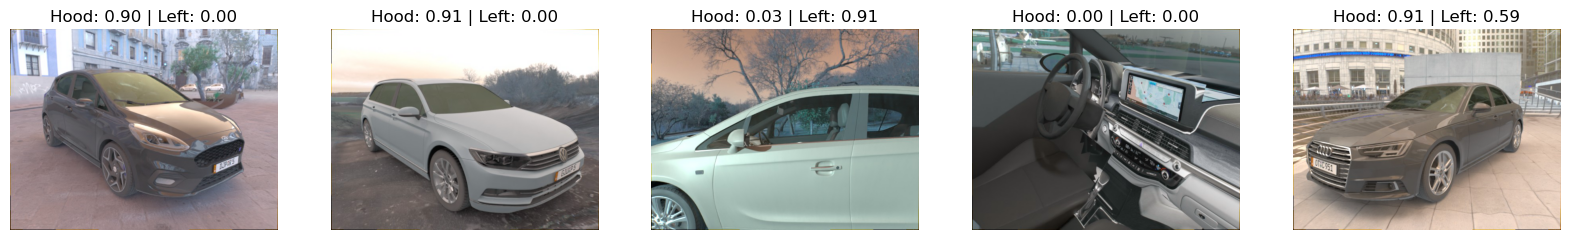

In [320]:
plot_random_images(df, 5)

In [323]:
# show resolution 
def get_img_resolution(image_path: str) -> Tuple[int, int]: 
    img_path = os.path.join(PATH_TO_IMG, "imgs", image_path)
    img = cv2.imread(img_path) # Height, Width, n_Channels
    return img.shape[0], img.shape[1]


In [324]:
df["resolution"] = df["filename"].apply(get_img_resolution)

In [328]:
df["resolution"].unique() # all the images have the same dimensions

array([(506, 674)], dtype=object)

In [329]:
def plot_color_histogram(image_path: str) -> None: 
    img_path = os.path.join(PATH_TO_IMG, "imgs", image_path)
    image = cv2.imread(img_path) # Height, Width, n_Channels
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            image[:, :, i], bins=256, range=(0, 255)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")
    plt.show()

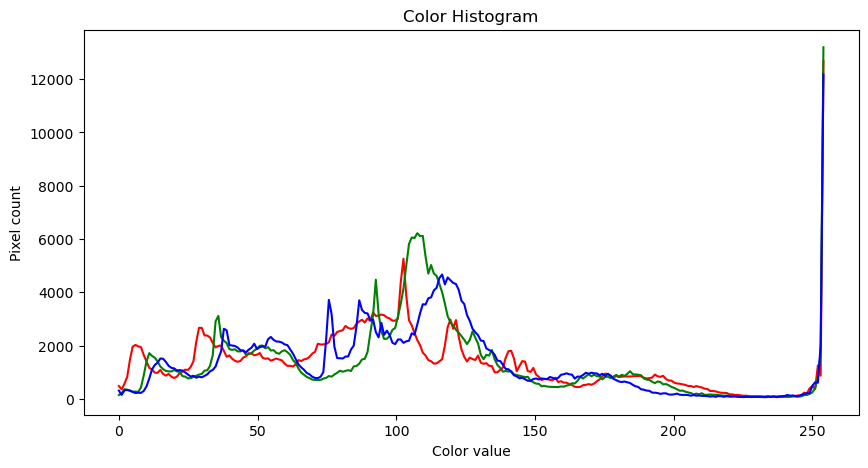

In [334]:
plot_color_histogram(df['filename'].iloc[15])

In [353]:
def get_img_brightness(image_path: str) -> float: 
    img_path = os.path.join(PATH_TO_IMG, "imgs", image_path)
    image = cv2.imread(img_path) # Height, Width, n_Channels
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(image_gray)

In [355]:
df["brightness"] = df["filename"].apply(get_img_brightness)
df.head()

,filename,perspective_score_hood,perspective_score_backdoor_left,resolution,brightness
0,66ee2d88-f403-4821-a370-8a3d72e200f9.jpg,0.27352,0.439526,"(506, 674)",106.488799
1,bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg,0.00000,0.902682,"(506, 674)",111.135487
2,4c297488-c81f-464d-92bf-1c408333a912.jpg,0.00000,0.900864,"(506, 674)",152.913741
3,6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg,0.00000,0.213162,"(506, 674)",139.522285
4,bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg,0.00000,0.818388,"(506, 674)",145.764406


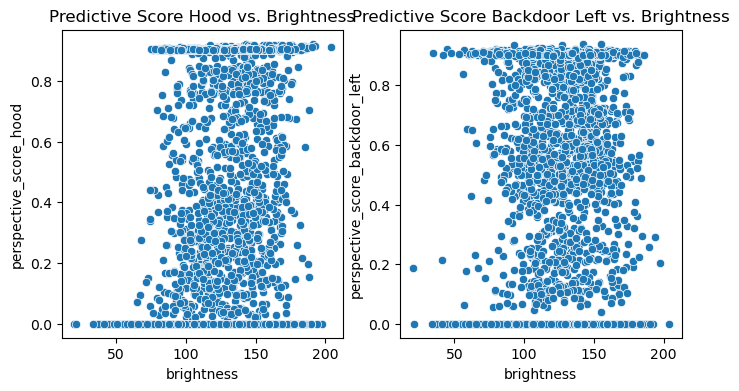

In [360]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='brightness', y='perspective_score_hood')
plt.title('Predictive Score Hood vs. Brightness')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='brightness', y='perspective_score_backdoor_left')
plt.title('Predictive Score Backdoor Left vs. Brightness')

plt.show()

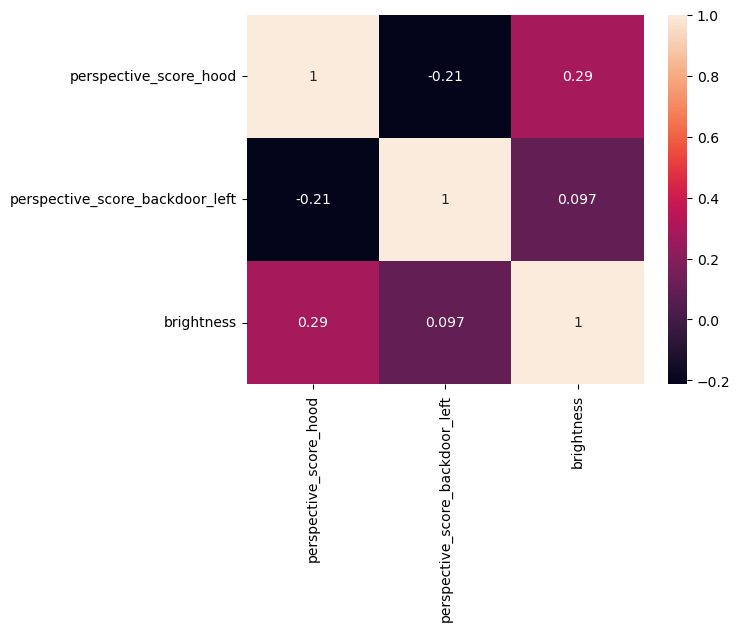

In [361]:
corr = df.corr(method="pearson", numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show("Correlation Matrix")
plt.show()

**Conclusion**: 
- Clean dataset, no duplicates no NaN values 
- Distribution of both scores look very similar, but with little correlation between them (~ -0.2)
- No outlier in the scores, ranging from 0-1 
- All images have the same dimensions but different color histograms 
- Brightness has positive correlation with perspective_score_hood, indicating it was taken outside (from my hypothesis)

In [5]:
def turn_into_binary_labels(row): 
    if row <= 0.5: 
        return 0 
    else: 
        return 1 

In [7]:
df["hood_one_hot"] = df["perspective_score_hood"].apply(turn_into_binary_labels)

,filename,perspective_score_hood,perspective_score_backdoor_left,hood_one_hot
0,66ee2d88-f403-4821-a370-8a3d72e200f9.jpg,0.27352,0.439526,0
1,bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg,0.00000,0.902682,0
2,4c297488-c81f-464d-92bf-1c408333a912.jpg,0.00000,0.900864,0
3,6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg,0.00000,0.213162,0
4,bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg,0.00000,0.818388,0
...,...,...,...,...
3995,41c7b718-5142-44a4-928f-4f19ee35bfcf.jpg,0.00000,0.000000,0
3996,4e4a9fae-d6c7-4b00-ac36-3e32c12b7b7d.jpg,0.00000,0.000000,0
3997,4a447715-eebe-4c43-a5d4-069d418cd9b6.jpg,0.00000,0.000000,0
3998,ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg,0.00000,0.000000,0


In [12]:
df["backdoor_left_one_hot"] = df["perspective_score_backdoor_left"].apply(turn_into_binary_labels)
df 

,filename,perspective_score_hood,perspective_score_backdoor_left,hood_one_hot,backdoor_left_one_hot
0,66ee2d88-f403-4821-a370-8a3d72e200f9.jpg,0.27352,0.439526,0,0
1,bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg,0.00000,0.902682,0,1
2,4c297488-c81f-464d-92bf-1c408333a912.jpg,0.00000,0.900864,0,1
3,6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg,0.00000,0.213162,0,0
4,bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg,0.00000,0.818388,0,1
...,...,...,...,...,...
3995,41c7b718-5142-44a4-928f-4f19ee35bfcf.jpg,0.00000,0.000000,0,0
3996,4e4a9fae-d6c7-4b00-ac36-3e32c12b7b7d.jpg,0.00000,0.000000,0,0
3997,4a447715-eebe-4c43-a5d4-069d418cd9b6.jpg,0.00000,0.000000,0,0
3998,ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg,0.00000,0.000000,0,0


In [14]:
df["hood_one_hot"].sum(), df["backdoor_left_one_hot"].sum()

(1241, 1388)

In [24]:
df.query("perspective_score_hood <= 0.5").query("perspective_score_backdoor_left >= 0.5")

,filename,perspective_score_hood,perspective_score_backdoor_left,hood_one_hot,backdoor_left_one_hot
1,bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg,0.0,0.902682,0,1
2,4c297488-c81f-464d-92bf-1c408333a912.jpg,0.0,0.900864,0,1
4,bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg,0.0,0.818388,0,1
5,61ccbc54-83c4-4d0e-93ac-d0597a3b886e.jpg,0.0,0.900882,0,1
7,72d383f0-e0b7-434b-9f0b-237b44812a57.jpg,0.0,0.767950,0,1
...,...,...,...,...,...
2981,f444a9b7-20ff-4260-8db6-a9d7e8d75d70.jpg,0.0,0.901881,0,1
2982,74ed977f-18df-4a2a-b31d-f008985ddf6e.jpg,0.0,0.907565,0,1
2995,4378833f-b72a-42b4-9e53-0905442ac4b9.jpg,0.0,0.901702,0,1
2997,59a60fd4-b269-4a16-bd7f-e80da79f2fb5.jpg,0.0,0.905774,0,1


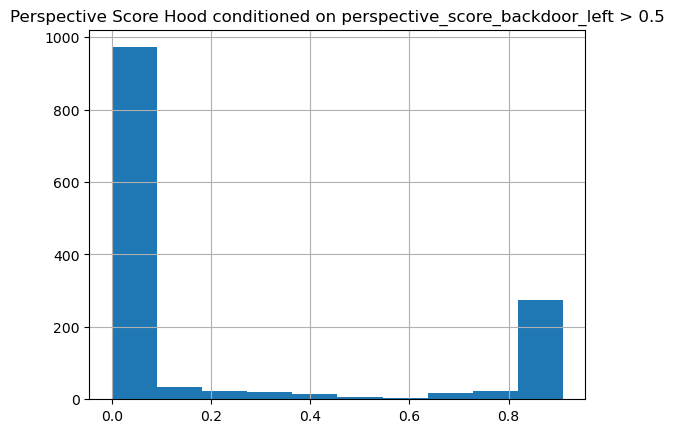

In [58]:
df.query("perspective_score_backdoor_left > 0.5")["perspective_score_hood"].hist()
_ = plt.title("Perspective Score Hood conditioned on perspective_score_backdoor_left > 0.5")

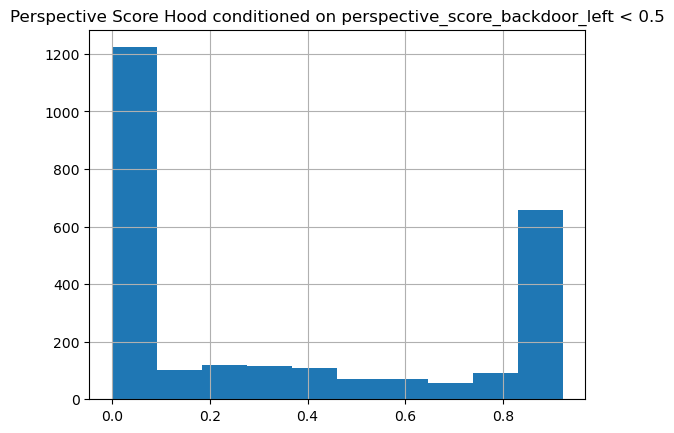

In [57]:
df.query("perspective_score_backdoor_left < 0.5")["perspective_score_hood"].hist()
_ = plt.title("Perspective Score Hood conditioned on perspective_score_backdoor_left < 0.5")

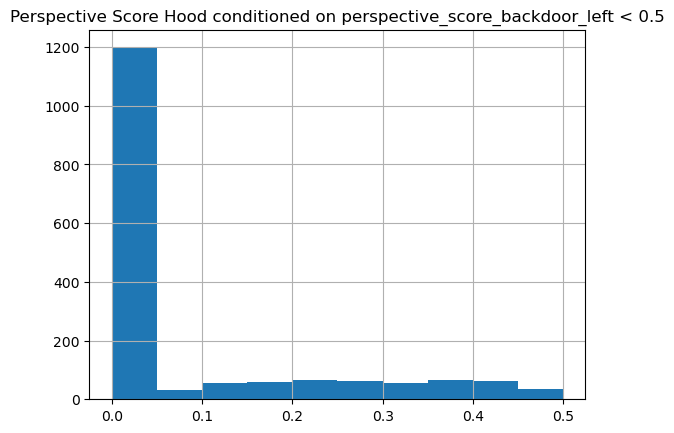

In [51]:
# check correlation 
df.query("perspective_score_backdoor_left < 0.5").query("perspective_score_hood < 0.5")["perspective_score_hood"].hist()
_ = plt.title("Perspective Score Hood conditioned on perspective_score_backdoor_left < 0.5")

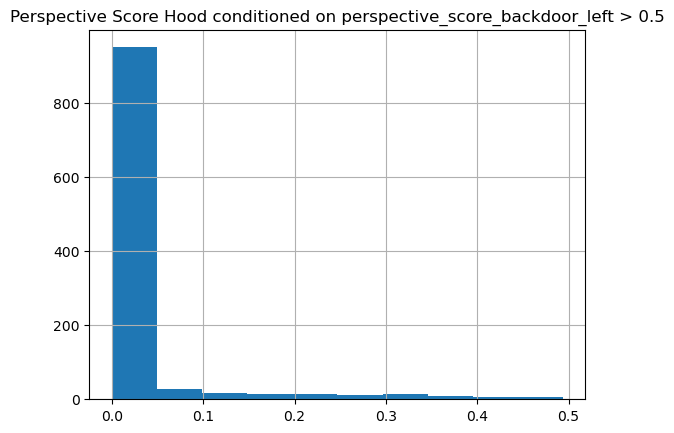

In [52]:
# check correlation 
df.query("perspective_score_backdoor_left > 0.5").query("perspective_score_hood < 0.5")["perspective_score_hood"].hist()
_ = plt.title("Perspective Score Hood conditioned on perspective_score_backdoor_left > 0.5")

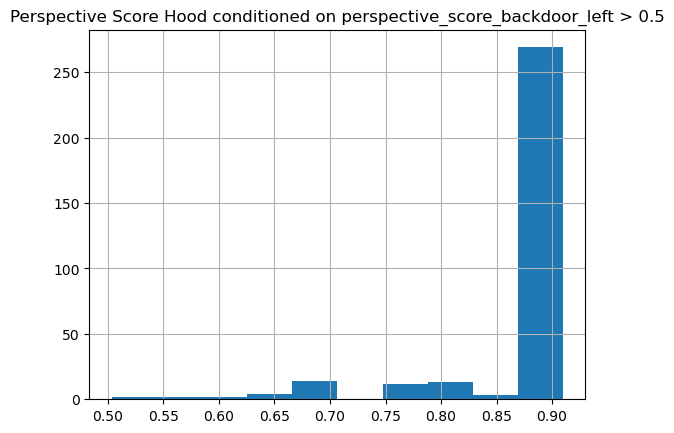

In [53]:
# check correlation 
df.query("perspective_score_backdoor_left > 0.5").query("perspective_score_hood > 0.5")["perspective_score_hood"].hist()
_ = plt.title("Perspective Score Hood conditioned on perspective_score_backdoor_left > 0.5")

### Split data into train, val and test datasets

In [462]:
from sklearn.model_selection import train_test_split

In [471]:
def reset_index(df: pd.DataFrame) -> pd.DataFrame: 
    return df.reset_index(drop=True)

In [509]:
df_train, df_test = train_test_split(df,test_size=0.2,train_size=0.8, random_state=42)
df_test, df_val = train_test_split(df_test, test_size=0.5, random_state=42)

In [510]:
df_train.shape, df_val.shape , df_test.shape 

((3200, 5), (400, 5), (400, 5))

In [515]:
# save the datasets 
df_train, df_val , df_test = reset_index(df_train), reset_index(df_val), reset_index(df_test)

In [516]:
pd.to_pickle(df_train, os.path.join(PATH_TO_IMG, "train_data.csv"))

In [517]:
pd.to_pickle(df_val, os.path.join(PATH_TO_IMG, "val_data.csv"))

In [518]:
pd.to_pickle(df_test, os.path.join(PATH_TO_IMG, "test_data.csv"))

### Model Analysis

In [1]:
from omegaconf import OmegaConf
import os 
os.chdir("..")
from trainers import LightingModel
import torch 
from torch import nn 
from torchvision import transforms 
import glob 
import pytorch_lightning as pl 
import matplotlib.pyplot as plt 

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /opt/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <D9949A91-AC47-3F4B-804D-0B66B93A7A59> /opt/miniconda3/envs/torch/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/miniconda3/envs/torch/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.uti

In [2]:
def load_test_model(model_path: str) -> nn.Module: 
    #model_path = "arch_vit_batchsize_6_weights_imagenet_img_size_224_augmentations_False_joint_training_True_hood_training_False_activation_sigmoid"
    cfg = OmegaConf.load(f"runs_configs_hydra/{model_path}/.hydra/config.yaml")
    file = glob.glob(f"lightning_logs/{model_path}/*/checkpoints/*.ckpt")[-1]  
    model = LightingModel(cfg)
    checkpoint = torch.load(file)

    model.load_state_dict(checkpoint["state_dict"])

    trainer = pl.Trainer(logger=None)
    test_dataloader = model._create_dataloader(mode="test")
    train_dataloader = model._create_dataloader(mode="train")
    val_dataloader = model._create_dataloader(mode="val")
    assert len(test_dataloader.dataset) == 400, "Length of test set is not correct"

    test_score = trainer.test(model, dataloaders=test_dataloader)

    return model, test_dataloader, train_dataloader, val_dataloader
    

In [4]:
best_model_path = r"arch_vit_batchsize_6_weights_imagenet_img_size_224_augmentations_False_joint_training_True_hood_training_False_activation_sigmoid"

best_model, test_dataloader, train_dataloader, val_dataloader = load_test_model(best_model_path)

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/albumentations/core/composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/kp/q79t5q_x00l6b4480dk80xl00000gn/T/ipykernel_66089/2717469761.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           Loss            │    0.08393775671720505    │
│        RMSE_Metric        │    0.27451443672180176    │
└───────────────────────────┴───────────────────────────┘

In [335]:
def plot_images_with_predictions(model: nn.Module, test_dataloader: torch.utils.data.DataLoader) -> None: 
    unnormalize = transforms.Compose([
            transforms.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]), 
            transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1])
        ])

    with torch.no_grad(): 
        for img, score1, score2 in test_dataloader: 
            pred1, pred2 = model(img) 
            break 
    imgs = unnormalize(img)
    plt.figure(figsize=(30,30))
    for i in range(6): 
        img = imgs[i].permute(1, 2, 0)
        plt.subplot(1, 6, i + 1)
        plt.imshow(img)
        score_hood = score1[i].item()
        score_hood = format(score_hood, ".1f")
        pred_hood = pred1[i].item()
        pred_hood = format(pred_hood, ".1f")

        score_backdoor_left = score2[i].item()
        score_backdoor_left = format(score_backdoor_left, ".1f")
        pred_backdoor_left = pred2[i].item()
        pred_backdoor_left = format(pred_backdoor_left, ".1f")

        plt.title(f"Hood: y:{score_hood} y_pred:{pred_hood} | Left: y:{score_backdoor_left} y_pred:{pred_backdoor_left}")
        plt.axis('off')
    plt.show()

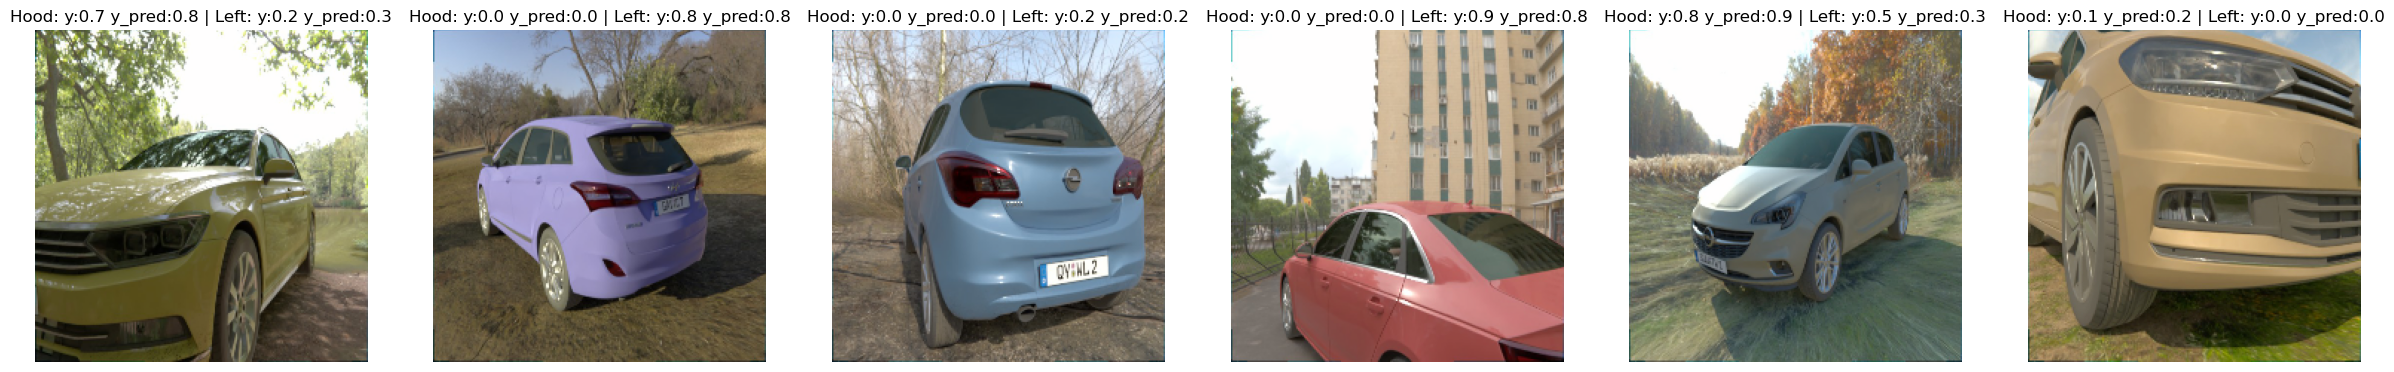

In [349]:
plot_images_with_predictions(best_model.model, test_dataloader)

#### Feature Visualization 

In [214]:
from sklearn.manifold import TSNE
from copy import deepcopy

In [216]:
best_model_copy = deepcopy(best_model)

In [217]:
best_model_copy.model.regressor_hood[3] = nn.Identity()
best_model_copy.model.regressor_hood[4] = nn.Identity()
best_model_copy.model.regressor_backdoor_left[3] = nn.Identity()
best_model_copy.model.regressor_backdoor_left[4] = nn.Identity()

In [218]:
for img, score1, score2 in test_dataloader: 
    break 

In [219]:
best_model.eval()
out1, out2 = best_model_copy.model(img)
out1.shape, out2.shape 

(torch.Size([6, 256]), torch.Size([6, 256]))

In [350]:
embeddings_hood = []
embeddings_backdoor_left = []
hood_score_list = []
backdoor_left_score_list = []
best_model.eval()
with torch.no_grad():
    for img, score1, score2 in train_dataloader: 
        emb1, emb2 = best_model_copy.model(img)

        embeddings_hood.extend(emb1.tolist())
        embeddings_backdoor_left.extend(emb2.tolist())
        hood_score_list.extend(score1.tolist())
        backdoor_left_score_list.extend(score2.tolist())

with torch.no_grad():
    for img, score1, score2 in test_dataloader: 
        emb1, emb2 = best_model_copy.model(img)

        embeddings_hood.extend(emb1.tolist())
        embeddings_backdoor_left.extend(emb2.tolist())
        hood_score_list.extend(score1.tolist())
        backdoor_left_score_list.extend(score2.tolist())

In [351]:
embeddings_hood = np.array(embeddings_hood)
embeddings_backdoor_left = np.array(embeddings_backdoor_left)
hood_score_list = np.array(hood_score_list)
backdoor_left_score_list = np.array(backdoor_left_score_list)
embeddings_hood.shape

(3600, 256)

In [352]:
tsne = TSNE(n_components=2, learning_rate="auto", init = "random", perplexity=80)
embeddings_hood_ = tsne.fit_transform(embeddings_hood)
embeddings_backdoor_left_ = tsne.fit_transform(embeddings_backdoor_left)

In [353]:
embeddings_backdoor_left.shape, hood_score_list.shape 

((3600, 256), (3600, 1))

In [354]:
def plot_embeddings(embeddings, scores, score_name): 
    ax = sns.scatterplot(x = embeddings[:, 0], y = embeddings[:, 1], hue = scores[:, 0], palette="viridis",  alpha=0.6, s=40)

    norm = plt.Normalize(hood_score_list[:, 0].min(), hood_score_list[:, 0].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    # Remove the legend and add a colorbar
    ax.legend(loc="best", prop={'size': 4})
    ax.get_legend().remove()
    cbar = ax.figure.colorbar(sm)
    tick_font_size = 10
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    
    plt.title(f"Embedding Plot for {score_name} Prediction")

/var/folders/kp/q79t5q_x00l6b4480dk80xl00000gn/T/ipykernel_92741/1588259123.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


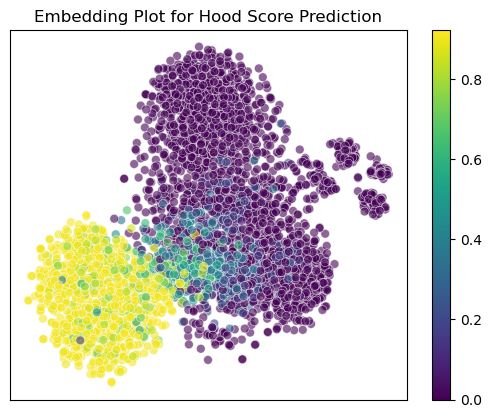

In [355]:
plot_embeddings(embeddings_hood_, hood_score_list, "Hood Score")

/var/folders/kp/q79t5q_x00l6b4480dk80xl00000gn/T/ipykernel_92741/1588259123.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


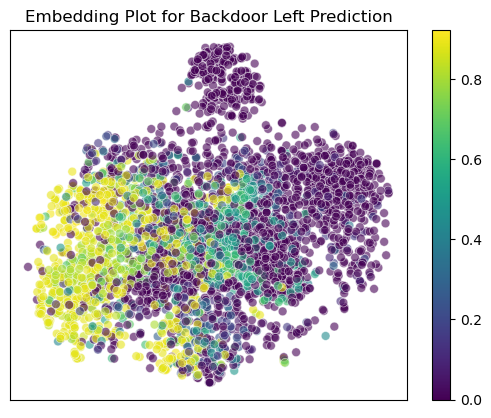

In [356]:
plot_embeddings(embeddings_backdoor_left_, backdoor_left_score_list, "Backdoor Left")

In [264]:
loss_fn = nn.MSELoss()
loss_hood = 0 
loss_backdoor_left = 0 
loss = 0
with torch.no_grad():
    for img, score1, score2 in test_dataloader: 
        pred1, pred2 = best_model(img)
        loss_hood += loss_fn(pred1, score1).item()
        loss_backdoor_left += loss_fn(pred2, score2).item()
        loss += loss_fn(pred1, score1).item() + loss_fn(pred2, score2).item()
        

In [270]:
rounded_loss_hood = format(loss_hood/len(test_dataloader), "0.2f")
rounded_loss_backdoor_left = format(loss_backdoor_left/len(test_dataloader), "0.2f")

In [272]:
print(f"Loss for Hood Perspective Predicition is {rounded_loss_hood}")
print(f"Loss for Backdoor Left Perspective Predicition is {rounded_loss_backdoor_left}")

Loss for Hood Perspective Predicition is 0.01
Loss for Backdoor Left Perspective Predicition is 0.07


**Conclusion**
- It is quite harder to predict the backdoor left score than it is to predict the hood score (my hypothesis is that a lot of overlapping features are between every door and not only backdoor left, on the other hand it is quite easy to distinguish the visibility of the hood score)